#####  TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type  
##### 가 발생하는 경우가 있습니다. 이것은 pandas 버전과 numpy의 버전이 맞지않은 경우에 발생합니다.
##### 위의 에러가 발생하는 경우에는, 
* (1) pip 버전 업그레이드 : (anaconda prompt "관리자권한 실행" 후) python.exe -m pip install --upgrade pip
* (2) pandas 버전 업그레이드 : (Jupyter Notebook "관리자권한 실행" 후) !pip install pandas --upgrade
* (3) numpy 버전 업그레이드 :  (Jupyter Notebook "관리자권한 실행" 후) !pip install numpy --upgrade
##### 를 하시기 바랍니다.

In [3]:
#경고 알림 무시
import warnings
warnings.filterwarnings(action='ignore')

# 1. 통계분석
## [3] 데이터 실습
### 1.회귀분석 실습 : tips 데이터

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


- total_bill: 식사에 대한 총 청구 금액 (달러 단위).
- tip: 손님이 남긴 팁 금액 (달러 단위).
- sex: 손님의 성별 (남성/여성).
- smoker: 손님이 흡연자인지 여부 (예/아니오).
- day: 식사가 이루어진 요일 (목요일, 금요일, 토요일, 일요일).
- time: 식사가 이루어진 시간 (점심/저녁).
- size: 손님 테이블의 인원 수.

In [11]:
sorted(tips['size'].unique())

[1, 2, 3, 4, 5, 6]

In [13]:
type(tips['size'])

pandas.core.series.Series

In [15]:
type(tips.size)

int

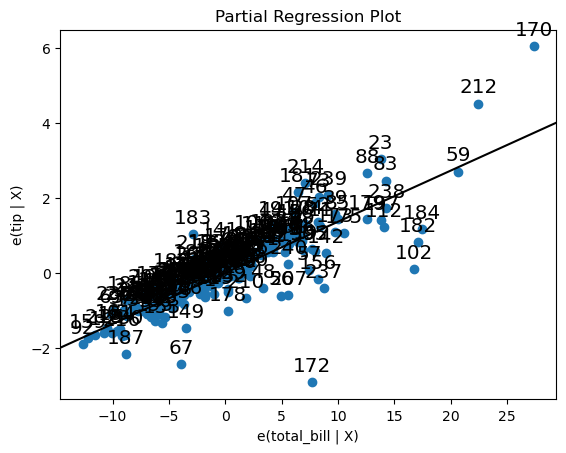

In [69]:
# 총 청구 금액과 tip의 상관관계를 그래프로 나타냄
import statsmodels.api as sm
# 부분 회귀에 사용한 독립 변수와 종속 변수를 제외한 나머지 변수 이름을 리스트로 추출
others = list(set(tips.columns).difference(set(["total_bill", "tip"])))

# 나머지 변수를 고정하고 fixed_acidity가 종속변수 품질에 미치는 영향에 부분회귀 수행
p, resids = sm.graphics.plot_partregress("tip", "total_bill",
                                         others, data = tips, ret_coords = True)
#ret_coords : 잔차 데이터 변환 여부

In [26]:
# 총 청구 금액과 tip의 상관관계(비율을 계산한) column 추가
tips['rate'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [19]:
# 요일별 빈도수 측정하기
tips.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [28]:
# 요일과 tip의 상관관계 기술 통계
tips.groupby('day')['rate'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,0.161276,0.038652,0.072961,0.138210,0.153846,0.192687,0.266312
Fri,19.0,0.169913,0.047665,0.103555,0.133739,0.155625,0.196637,0.263480
Sat,87.0,0.153152,0.051293,0.035638,0.123863,0.151832,0.188271,0.325733
Sun,76.0,0.166897,0.084739,0.059447,0.119982,0.161103,0.187889,0.710345


In [34]:
# 성별 별 빈도수 측정하기
tips.sex.value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [36]:
# 성별과 tip의 상관관계 기술 통계
tips.groupby('sex')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


In [38]:
tips_corr = tips.corr(method = 'pearson', numeric_only=True)
tips_corr

,total_bill,tip,size,rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
rate,-0.338624,0.342370,-0.142860,1.000000


In [46]:
#T검정시 사용
from scipy import stats
#회귀시 사용
from statsmodels.formula.api import ols, glm

Rformula = 'tip ~ total_bill + sex + smoker + day + time + size'
# 선형 회귀 모델 중 OLS(ordinary least squares) 모델 사용
regression_result = ols(Rformula, data = tips).fit()
#선형 회귀 관련 통계값 확인
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.20e-28
Time:                        13:11:11   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.310      0.022       0.087       1.095
sex[T.Female]      0.0324      0.142      0.229      0.819      -0.247       0.311
smoker[T.No]       0.0864      0.147      0.589      0.556      -0.202       0.375
day[T.Fri]         0.1623      0.393      0.412      0.680      -0.613       0.937
day[T.Sat]         0.0408      0.471      0.087      0.931      -0.886       0.968
day[T.Sun]         0.1368      0.472      0.290      0.772      -0.793       1.066
time[T.Dinner]    -0.0681      0.445     -0.153      0.878      -0.944       0.808
total_bill         0.0945      0.010      9.841      0.000       0.076       0.113
size               0.1760      0.090      1.966      0.051      -0.000       0.352
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
sample1 = tips[tips.columns.difference(['tip'])]
sample1 = sample1[0:5][:]
sample1.head(10)

,day,rate,sex,size,smoker,time,total_bill
0,Sun,0.059447,Female,2,No,Dinner,16.99
1,Sun,0.160542,Male,3,No,Dinner,10.34
2,Sun,0.166587,Male,3,No,Dinner,21.01
3,Sun,0.139780,Male,2,No,Dinner,23.68
4,Sun,0.146808,Female,4,No,Dinner,24.59


In [50]:
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    2.735655
1    2.250867
2    3.259044
3    3.335332
4    3.805740
dtype: float64

In [52]:
tips[0:5]['tip']

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

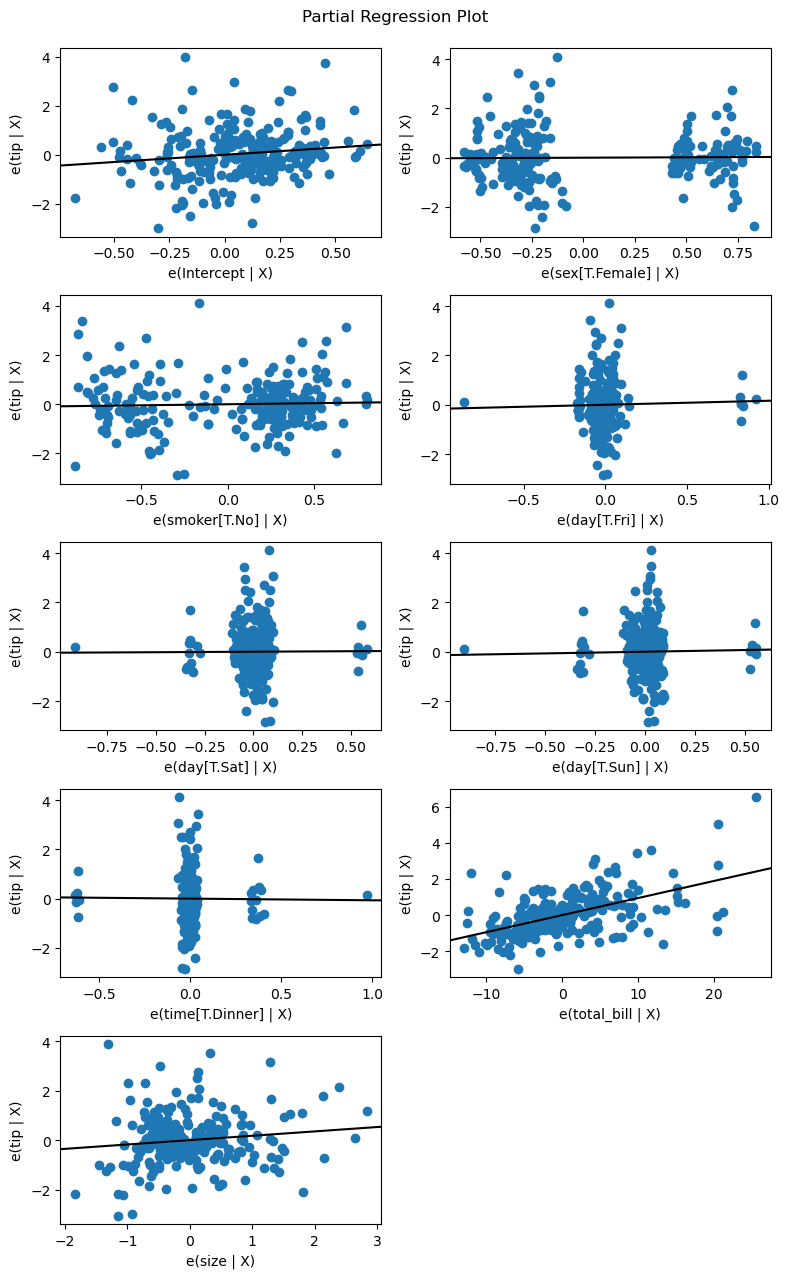

In [54]:
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

### 2.상관분석 실습 : iris 데이터

In [179]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- sepal_length: 꽃받침의 길이 (cm 단위).
- sepal_width: 꽃받침의 너비 (cm 단위).
- petal_length: 꽃잎의 길이 (cm 단위).
- petal_width: 꽃잎의 너비 (cm 단위).
- species: 아이리스 꽃의 종 (setosa, versicolor, virginica).

In [62]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

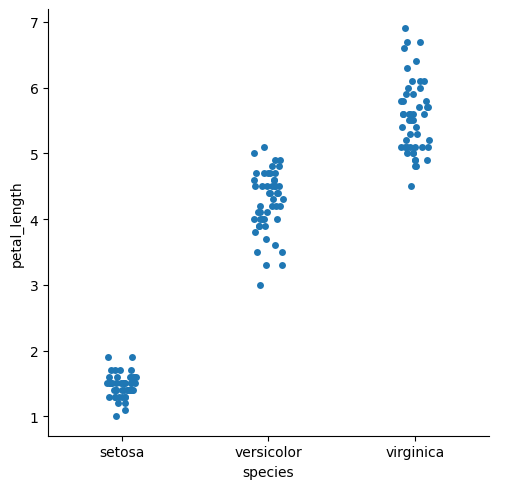

In [79]:
# 종과 꽃잎의 상관 관계
sns.catplot(data=iris, x="species", y="petal_length")

In [64]:
iris_corr = iris.corr(method = 'pearson', numeric_only=True)
# method = 'pearson' : 피어슨 상관계수(Pearson correlation coefficient)를 계산하는 방법

iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


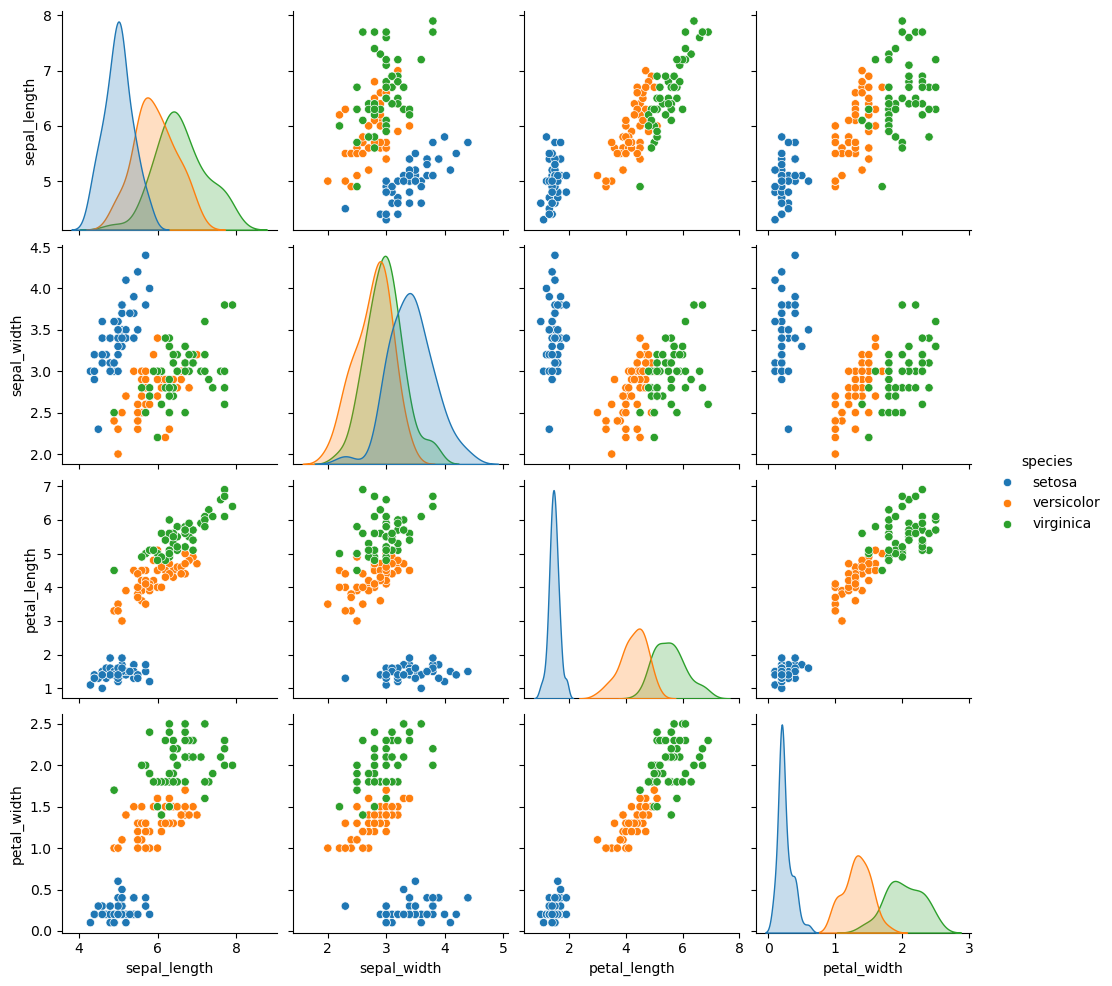

In [75]:
# 데이터프레임의 모든 변수 쌍에 대한 산점도(scatter plot)와 각 변수의 분포를 시각화하는 데 사용
sns.pairplot(iris, hue = 'species')

plt.show()

In [205]:
import pandas as pd

# 각 구간의 경계값을 설정
bins = [0, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9]
bins2 = [0, 0.4, 0.9, 1.4, 1.9, 2.4,2.9]
# 각 구간에 대한 레이블을 정의
labels = [0, 1, 2, 3, 4, 5, 6, 7]
labels2 = [0, 0.5, 1, 1.5, 2, 2.5]

# pd.cut을 사용하여 나이를 범주형 데이터로 변환
# ages 리스트의 각 값이 bins 리스트의 구간에 따라 레이블로 변환됨
iris['iris_sl'] = pd.cut(iris['sepal_length'], bins, labels=labels)
iris['iris_sw'] = pd.cut(iris['sepal_width'], bins, labels=labels)
iris['iris_pl'] = pd.cut(iris['petal_length'], bins, labels=labels)
iris['iris_pw'] = pd.cut(iris['petal_width'], bins2, labels=labels2)


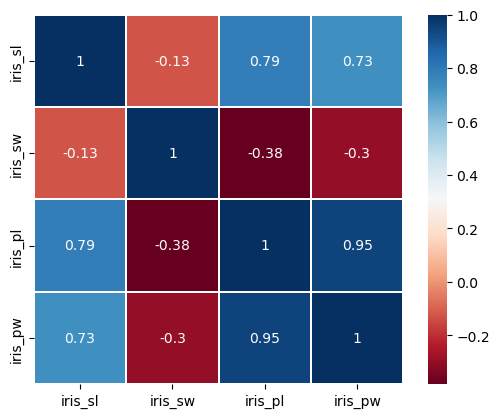

In [207]:
heatmap_data = iris[['iris_sl', 'iris_sw', 'iris_pl', 'iris_pw']]

colormap = plt.cm.RdBu

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, 
            cmap = colormap, linecolor = 'white', annot = True,annot_kws = {"size": 10})

plt.show()

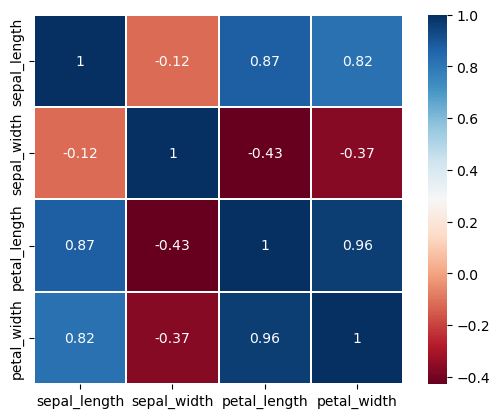

In [209]:
heatmap_data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

colormap = plt.cm.RdBu

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, 
            cmap = colormap, linecolor = 'white', annot = True,annot_kws = {"size": 10})

plt.show()

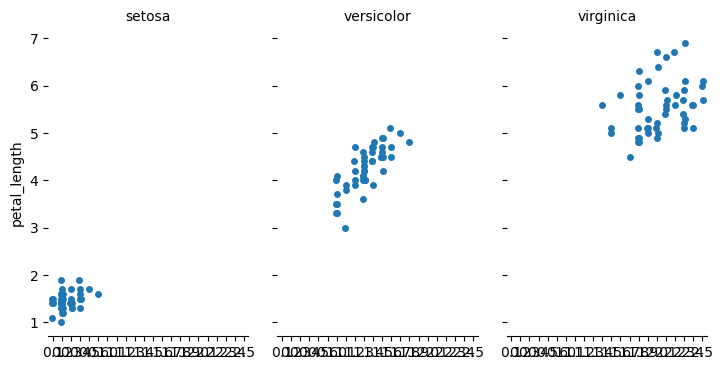

In [147]:
# Seaborn의 catplot 함수를 사용하여 데이터 시각화를 수행
g = sns.catplot(
    data=iris,              # 분석할 데이터프레임
    x="petal_width",          
    y="petal_length",           
    col="species",
    height=4,                  # 각 서브플롯의 높이
    aspect=.6                  # 서브플롯의 가로 세로 비율
)

# y축 라벨 설정
g.set_axis_labels("", "petal_length")


# 각 서브플롯의 제목 형식을 설정
g.set_titles("{col_name}")

# 왼쪽 여백을 제거하여 시각적 깔끔함을 높임
g.despine(left=True)


In [91]:
iris.groupby('species')['petal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,0.246,0.105386,0.1,0.2,0.2,0.3,0.6
versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


In [95]:
iris.groupby('species')['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9
